Ganerate

import library

In [260]:
import pandas as pd
import numpy as np
import random
import math
import csv
#from compiler.ast import flatten
import matplotlib.pyplot as plt
from matplotlib import patches
from mpl_toolkits.mplot3d import Axes3D

define generate

In [261]:
def generate_3d_sample(mean_array, num_samples_per_cluster, cov, output_side_length):
    y = np.zeros((num_samples_per_cluster * len(mean_array), 3))
    for i in range(len(mean_array)):
        generated_data = np.floor(np.random.multivariate_normal(mean_array[i], cov, num_samples_per_cluster))
        y[(num_samples_per_cluster * i):(num_samples_per_cluster * (i + 1)), :] = generated_data

    z = np.zeros((output_side_length,output_side_length, output_side_length))
    for i in range(output_side_length):
            for j in range(output_side_length):
                for k in range(output_side_length):
                    if (y == [i,j,k]).all(1).any():
                        z[i,j,k] = 1
    return z

generate one data

In [274]:
num_mean=3
output_side_length = 20
num_samples_per_cluster = 50
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
sample=random.sample(range(0,8000),num_mean)
mean_array=[]
for i in range(num_mean):
    tuple_z=int(sample[i]/math.pow(output_side_length,2))
    tuple_y=int((sample[i]%math.pow(output_side_length,2))/output_side_length)
    tuple_x=int(sample[i]%output_side_length)
    tuple_sample=(tuple_x,tuple_y,tuple_z)
    mean_array.append(tuple_sample)
#z = generate_3d_sample(mean_array, num_samples_per_cluster, cov, output_side_length)
z = generate_3d_sample(mean_array, num_samples_per_cluster, cov, output_side_length)

save data

In [275]:
xx = z.flatten()
filename='sample_3_10'+'.csv'
with open("C:/Users/Administrator/Desktop/" + filename, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(len(xx)):
            writer.writerow([xx[i]])

show data

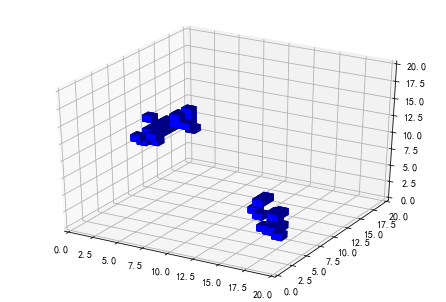

36


In [276]:
#显示出分布
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['SimHei']

def plot_cube(num,N):
    num_x=int(num%N)
    num_y=int((num%math.pow(N,2))/N)
    num_z=int(num/math.pow(N,2))
#   fig= plt.figure()
#   ax = Axes3D(fig)
    xx=np.linspace(num_x, num_x+1, 2)
    yy=np.linspace(num_y, num_y+1, 2)
    zz=np.linspace(num_z, num_z+1, 2)
    
    xx,yy=np.meshgrid(xx, yy)    
    z=np.zeros((1,1))
    z[0]=num_z
    ax.plot_surface(xx, yy, z ,color='b')
    ax.plot_surface(xx, yy, z+1,color='b')
    
    yy,zz = np.meshgrid(yy, zz)
    x=np.zeros((1,1))
    x[0]=num_x
    ax.plot_surface(x,yy,zz,color='b')
    ax.plot_surface(x+1,yy,zz,color='b')
    
    xx, zz = np.meshgrid(xx, zz)
    y=np.zeros((1,1))
    y[0]=num_y
    ax.plot_surface(xx,y,zz,color='b')
    ax.plot_surface(xx,y+1,zz,color='b')
    
    #ax.set_zlim(-2, 2)
    
#ata=pd.read_csv("C:/Users/Administrator/Desktop/sample_3_10.csv",encoding = "utf-8",header=None)
data=np.loadtxt("C:/Users/Administrator/Desktop/sample_3_10.csv",delimiter=",",skiprows=0)
N=20
data2=[]
for i in range(0,N*N*N):
    if data[i]==1:
        data2.append(i)
fig= plt.figure()
ax = Axes3D(fig)

for i in range(N*N*N):
    if i in data2:
        plot_cube(i,N)
ax.set_zlim(0, 20)
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
plt.show()
print(len(data2))